# BERTopic Modelling and Sentiment Analysis - Reviews

For the BERT-based sentiment analysis, word frequency analysis and data visualizations were used to understand the emotions expressed in reviews. Sentiment analysis is the process of understanding emotions, opinions, and subjectivity in text (Pang and Lee, 2008). We used a DistilBERT-based sentiment classification model (Sanh et al., 2019) to process large amounts of lexical data and capture the meaning behind words to understand how people feel about a topic. For a better analysis, separate word clouds were created to highlight common words in positive and negative sentiments. By using both text-based and visual methods, the research uncovered patterns in emotions and common themes in user opinions. The analysis helped understand customer feedback better and provided insights into how people express their emotions in digital spaces.

# Results

The topic modeling revealed important insights into the audience discussions on 'Black Mirror' and 'Love, Death & Robots'. Topic 0 focused on general reviews of its episodes and visual styles. Topic 1 explored Black Mirror's commentary on technology and society. Topic 2 covered neutral and general views. Topic 3 showcased positive feedback on animation shorts. Topic 4's focal point was artistic elements of the 'Jibaro' episode of 'Love, Death & Robots'. Topic 5 discussed Metalhead's heavy metal influences and Topic 6  drew attention to ratings and female characters. The majority of reviews were bundled as 'uncategorised content' under Topic -1. Further, sentiment analysis's results were predominantly positive (65.5%) for the subject matter. The word cloud showed frequent use of words like "good", "love", and "great" indicating a positive response from the audience. Disapproval towards the show was frequent (34.5%), "bad" and "boring" were the dominant words in the negative  set of word clouds. This sentiment distribution suggested an overall favorable reception with room for improvement addressed by negative feedback. World clouds provided visual context to these sentiments, aiding understanding of key drivers behind audience opinions. Analyzing audience sentiment and topics was important to understand viewer preferences, helping content creators refine storytelling strategies and improve future productions.


# Topic Modelling

In [ ]:
# Install and Import Libraries

!pip install bertopic
!pip install hdbscan[]

import os
import re
import umap
import hdbscan
import pandas as pd
import seaborn as sns
from bertopic import BERTopic
from google.colab import drive
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/

In [ ]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Data from drive

directory_path = '/content/drive/MyDrive/Data_Project_Reviews'

all_files = []

print(f"Files in {directory_path}:")
print(os.listdir(directory_path))

all_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]


if not all_files:
    print("No CSV files found in the directories. Please check the directory paths and file names.")
else:
    dfs = [pd.read_csv(file) for file in all_files]
    df = pd.concat(dfs, ignore_index=True)

print(f"Files in {directory_path}:")
print(os.listdir(directory_path))

all_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]


if not all_files:
    print("No CSV files found in the directories. Please check the directory paths and file names.")
else:
    dfs = [pd.read_csv(file) for file in all_files]
    df = pd.concat(dfs, ignore_index=True)

Files in /content/drive/MyDrive/Data_Project_Reviews:
['black_mirror_reviews.csv', 'love_Robots_reviews.csv']
Files in /content/drive/MyDrive/Data_Project_Reviews:
['black_mirror_reviews.csv', 'love_Robots_reviews.csv']


In [ ]:
# Data Cleaning and Preprocessing

dfs = [pd.read_csv(file) for file in all_files]
df = pd.concat(dfs, ignore_index=True)
df.info()
df_cleaned = df.drop(["Rating", "Date"], axis=1, errors='ignore')

# Changed 'Text' to 'Review' to match the actual column name
docs = df_cleaned['Content'].tolist()
print(df_cleaned.columns)
print(f"Documents before cleaning: {len(df_cleaned)}")
docs_cleaned = [doc for doc in df_cleaned if len(doc.strip()) > 0]
print(f"Documents after cleaning: {len(df_cleaned)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833 entries, 0 to 1832
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rating   1833 non-null   object
 1   Title    1833 non-null   object
 2   Content  1833 non-null   object
 3   Author   1833 non-null   object
 4   Date     1833 non-null   object
dtypes: object(5)
memory usage: 71.7+ KB
Index(['Title', 'Content', 'Author'], dtype='object')
Documents before cleaning: 1833
Documents after cleaning: 1833


In [ ]:
# Text Preprocessing
def preprocess(text):
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    cleaned_text = cleaned_text.lower()
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    print(f"Original: {text} -> Cleaned: {cleaned_text}")
    return cleaned_text if len(cleaned_text) > 2 else ""

    df_cleaned = [doc for doc in docs_cleaned if len(doc.strip()) > 0]

print(f"Number of documents after cleaning: {len(df_cleaned)}")

Number of documents after cleaning: 1833


In [ ]:
# Text Preprocessing and Topic Modeling

from sklearn.feature_extraction.text import TfidfVectorizer
import re

# Custom stopwords list
custom_stopwords = ["a", "able", "about", "above", "according", "accordingly", "across", "actually", 'i', 'you','to', 'it', 'the','no', "a", "able", "about", "above", "according", "accordingly", "across", "actually", "after", "afterwards", "again", "against", "all", "allow", "allows", "almost","alone", "along", "already", "also", "although", "always", "am", "among",
    "amongst", "an", "and", "another", "any", "anybody", "anyhow", "anyone","anything", "anyway", "anyways", "anywhere", "apart", "appear", "appreciate","appropriate", "are", "around", "as", "aside", "ask", "asking", "associated",
    "at", "available", "away", "awfully", "b", "be", "became", "because", "become","becomes", "becoming", "been", "before", "beforehand", "behind", "being","believe", "below", "beside", "besides", "best", "better", "between", "beyond",
    "both", "brief", "but", "by", "c", "came", "can", "cannot", "cant", "cause","causes", "certain", "certainly", "changes", "clearly", "co", "com", "come","comes", "concerning", "consequently", "consider", "considering", "contain",
    "containing", "contains", "corresponding", "could", "course", "currently", "d","definitely", "described", "despite", "did", "different", "do", "does", "doing","done", "down", "downwards", "during", "e", "each", "edu", "eg", "eight",
    "either", "else", "elsewhere", "enough", "entirely", "especially", "et", "etc","even", "ever", "every", "everybody", "everyone", "everything", "everywhere","ex", "exactly", "example", "except", "f", "far", "few", "fifth", "first",
    "five", "followed", "following", "follows", "for", "former", "formerly","forth", "four", "from", "further", "furthermore", "g", "get", "gets", "getting","given", "gives", "go", "goes", "going", "gone", "got", "gotten", "greetings",
    "h", "had", "happens", "hardly", "has", "have", "having", "he", "hello", "help","hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers","herself", "hi", "him", "himself", "his", "hither", "hopefully", "how", "howbeit",
    "however", "i", "ie", "if", "ignored", "immediate", "in", "inasmuch", "inc","indeed", "indicate", "indicated", "indicates", "inner", "insofar", "instead",
    "into", "inward", "is", "it", "its", "itself", "j", "just", "k", "keep", "keeps","kept", "know", "knows", "known", "l", "last", "lately", "later", "latter",
    "latterly", "least", "less", "lest", "let", "like", "liked", "likely", "little","look", "looking", "looks", "ltd", "m", "mainly", "many", "may", "maybe", "me",
    "mean", "meanwhile", "merely", "might", "more", "moreover", "most", "mostly","much", "must", "my", "myself", "n", "name", "namely", "nd", "near", "nearly",
    "necessary", "need", "needs", "neither", "never", "nevertheless", "new", "next","nine", "no", "nobody", "non", "none", "noone", "nor", "normally", "not",
    "nothing", "novel", "now", "nowhere", "o", "obviously", "of", "off", "often","oh", "ok", "okay", "old", "on", "once", "one", "ones", "only", "onto", "or",
    "other", "others", "otherwise", "ought", "our", "ours", "ourselves", "out","outside", "over", "overall", "own", "p", "particular", "particularly", "per",
    "perhaps", "placed", "please", "plus", "possible", "presumably", "probably","provides", "q", "que", "quite", "qv", "r", "rather", "rd", "re", "really",
    "reasonably", "regarding", "regardless", "regards", "relatively","respectively", "right", "s", "said", "same", "saw", "say", "saying", "says",
    "second", "secondly", "see", "seeing", "seem", "seemed", "seeming", "seems","seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven",
    "several", "shall", "she", "should", "since", "six", "so", "some", "somebody","somewhere", "soon", "sorry", "specified", "specify", "specifying", "still",
    "sub", "such", "sup", "sure", "t", "take", "taken", "tell", "tends", "th","than", "thank", "thanks", "thanx", "that", "thats", "the", "their", "theirs",
    "them", "themselves", "then", "thence", "there", "thereafter", "thereby","therefore", "therein", "theres", "thereupon", "these", "they", "think",
    "third", "this", "thorough", "thoroughly", "those", "though", "three","through", "throughout", "thru", "thus", "to", "together", "too", "took",
    "toward", "towards", "tried", "tries", "truly", "try", "trying", "twice","two", "u", "un", "under", "unfortunately", "unless", "unlikely", "until",
    "unto", "up", "upon", "us", "use", "used", "useful", "uses", "using","usually", "uucp", "v", "value", "various", "very", "via", "viz", "vs", "w",
    "want", "wants", "was", "way", "we", "welcome", "well", "went", "were","what", "whatever", "when", "whence", "whenever", "where", "whereafter",
    "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which","while", "whither", "who", "whoever", "whole", "whom", "whose", "why",
    "will", "willing", "wish", "with", "within", "without", "wonder", "would","x", "y", "yes", "yet", "you", "your", "yours", "yourself", "yourselves",
    "z", "zero",'im', 'yeah','dont', 'hey','youre', 'episode']

# Tokenizer function with stopword filtering
def custom_tokenizer(text):
    text = re.sub(r'\W+', ' ', text.lower())  # Remove non-alphanumeric characters and lowercase
    tokens = text.split()  # Tokenize by whitespace
    return [token for token in tokens if token not in custom_stopwords]  # Remove stopwords

# Preprocess documents
docs = df_cleaned['Content'].tolist()
docs = [doc.lower() for doc in docs]  # Ensure lowercase text

# Create TfidfVectorizer with custom tokenizer
vectorizer_model = TfidfVectorizer(
    min_df=1,
    tokenizer=custom_tokenizer
)

# BERTopic
topic_model = BERTopic(vectorizer_model=vectorizer_model, nr_topics=8, min_topic_size=5, verbose=True)
topics, probs = topic_model.fit_transform(docs)

topic_info = topic_model.get_topic_info()
print("Topic Info:")
print(topic_info)

for topic in topic_info['Topic']:
    if topic != -1:
        print(f"Top words for topic {topic}:")
        print(topic_model.get_topic(topic))

2025-01-31 19:12:37,643 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/58 [00:00<?, ?it/s]

2025-01-31 19:12:51,456 - BERTopic - Embedding - Completed ✓
2025-01-31 19:12:51,462 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-01-31 19:13:24,985 - BERTopic - Dimensionality - Completed ✓
2025-01-31 19:13:24,990 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-01-31 19:13:25,107 - BERTopic - Cluster - Completed ✓
2025-01-31 19:13:25,109 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-01-31 19:13:26,766 - BERTopic - Representation - Completed ✓
2025-01-31 19:13:26,773 - BERTopic - Topic reduction - Reducing number of topics
2025-01-31 19:13:28,444 - BERTopic - Topic reduction - Reduced number of topics from 60 to 8


Topic Info:
   Topic  Count                               Name  \
0     -1    688      -1_episodes_show_black_mirror   
1      0    723           0_season_episodes_2_show   
2      1    198     1_black_mirror_season_episodes   
3      2    124                       2_content___   
4      3     48  3_animation_story_amazing_stories   
5      4     36                  4_season_5_show_4   
6      5     10      5_watched_stop_watching_watch   
7      6      6       6_jibaro_natures_dance_human   

                                      Representation  \
0  [episodes, show, black, mirror, series, animat...   
1  [season, episodes, 2, show, animation, series,...   
2  [black, mirror, season, episodes, technology, ...   
3                        [content, , , , , , , , , ]   
4  [animation, story, amazing, stories, good, ani...   
5  [season, 5, show, 4, bad, episodes, 3, miley, ...   
6  [watched, stop, watching, watch, shld, besssss...   
7  [jibaro, natures, dance, human, mother, art, a... 

In [ ]:
# HDBSCAN Clustering
embedding_model = SentenceTransformer("all-mpnet-base-v2")
embeddings = embedding_model.encode(docs)

clusterer = hdbscan.HDBSCAN(min_cluster_size=3, min_samples=2, gen_min_span_tree=True)
hdbscan_labels = clusterer.fit_predict(embeddings)

for i, label in enumerate(hdbscan_labels):
    print(f"Document {i}: Cluster {label}")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Document 0: Cluster 0
Document 1: Cluster 0
Document 2: Cluster 0
Document 3: Cluster 0
Document 4: Cluster 0
Document 5: Cluster 0
Document 6: Cluster 0
Document 7: Cluster 0
Document 8: Cluster 0
Document 9: Cluster 0
Document 10: Cluster 0
Document 11: Cluster 0
Document 12: Cluster 2
Document 13: Cluster 2
Document 14: Cluster 0
Document 15: Cluster 0
Document 16: Cluster 0
Document 17: Cluster 0
Document 18: Cluster 0
Document 19: Cluster 0
Document 20: Cluster 0
Document 21: Cluster 0
Document 22: Cluster 0
Document 23: Cluster 0
Document 24: Cluster 0
Document 25: Cluster 0
Document 26: Cluster 0
Document 27: Cluster 0
Document 28: Cluster 2
Document 29: Cluster 0
Document 30: Cluster 0
Document 31: Cluster 0
Document 32: Cluster 0
Document 33: Cluster 0
Document 34: Cluster 0
Document 35: Cluster 0
Document 36: Cluster 3
Document 37: Cluster 0
Document 38: Cluster 0
Document 39: Cluster 0
Document 40: Cluster 0
Document 41: Cluster 0
Document 42: Cluster 0
Document 43: Cluster 

In [ ]:
# Topic Information
topic_info = topic_model.get_topic_info()
print("Topic Info:")
print(topic_info)

for topic in topic_info['Topic']:
    if topic != -1:
        print(f"Top words for topic {topic}:")
        print(topic_model.get_topic(topic))

Topic Info:
   Topic  Count                               Name  \
0     -1    688      -1_episodes_show_black_mirror   
1      0    723           0_season_episodes_2_show   
2      1    198     1_black_mirror_season_episodes   
3      2    124                       2_content___   
4      3     48  3_animation_story_amazing_stories   
5      4     36                  4_season_5_show_4   
6      5     10      5_watched_stop_watching_watch   
7      6      6       6_jibaro_natures_dance_human   

                                      Representation  \
0  [episodes, show, black, mirror, series, animat...   
1  [season, episodes, 2, show, animation, series,...   
2  [black, mirror, season, episodes, technology, ...   
3                        [content, , , , , , , , , ]   
4  [animation, story, amazing, stories, good, ani...   
5  [season, 5, show, 4, bad, episodes, 3, miley, ...   
6  [watched, stop, watching, watch, shld, besssss...   
7  [jibaro, natures, dance, human, mother, art, a... 

In [ ]:
# Visualizing documents using BERTopic
embedding_model = SentenceTransformer("all-mpnet-base-v2")

topic_model.visualize_documents(docs=docs,
                                embeddings=embedding_model.encode(docs),
                                hide_annotations=True)


In [ ]:
# Similarity Matrix
topic_model.visualize_distribution(probs)

topic_model.visualize_barchart()

topic_model.visualize_topics()
topic_model.visualize_heatmap()

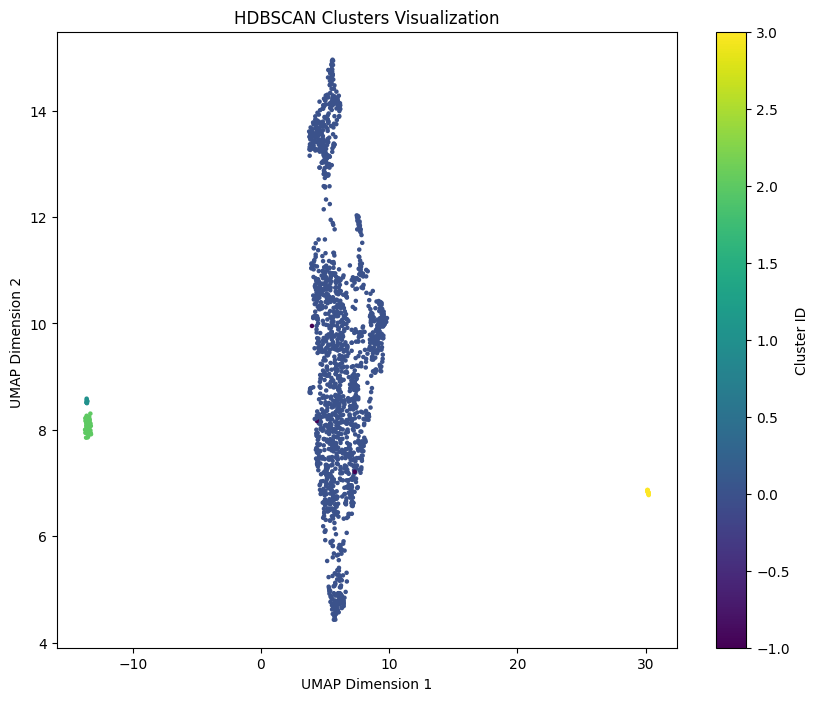

In [ ]:
# Visualizing HDBSCAN Clusters with UMAP

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embeddings_2d = reducer.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=hdbscan_labels, cmap='viridis', s=5)
plt.title('HDBSCAN Clusters Visualization')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2 ' )
plt.colorbar(label='Cluster ID')
plt.show()

## Sentiment Analysis

In [ ]:
# Sentiment Analysis

import pandas as pd
from transformers import pipeline
import os

# Specify the directory containing your CSV files
directory_path = "/content/drive/MyDrive/Data_Project_Reviews"

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Create an empty list to store DataFrames
dfs = []

# Loop through each CSV file and read it into a DataFrame
for file_name in csv_files:
    file_path = os.path.join(directory_path, file_name)  # Create the full file path
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Check the structure of the dataset
print(combined_df.head())

# Drop rows where 'Rating' is missing or contains 'No rating'
if 'Rating' not in combined_df.columns:
    raise ValueError("The dataset should contain a column named 'Rating'.")

combined_df = combined_df[combined_df['Rating'] != 'No rating']
combined_df = combined_df.dropna(subset=['Rating'])

# Now you can safely convert to float
combined_df['Rating'] = combined_df['Rating'].astype(float)

# Classify ratings into 'POSITIVE' and 'NEGATIVE'
combined_df['Rating_sentiment'] = combined_df['Rating'].apply(lambda x: 'POSITIVE' if x > 6 else 'NEGATIVE')

# Check for the 'Content' column containing the reviews
if 'Content' not in combined_df.columns:
    raise ValueError("The dataset should contain a column named 'Content'.")

combined_df = combined_df.dropna(subset=['Content'])

# Initialize the sentiment analysis pipeline with a pre-trained model
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

max_length = 512  # Experiment with this value

# Analyze sentiment for each review
sentiment_results = []
for content in combined_df['Content']:
    if len(content) > max_length:
        content = content[:max_length]  # Truncate if too long
    try:
        sentiment = sentiment_analyzer(content)
        sentiment_results.append(sentiment[0])
    except Exception as e:
        print(f"Error processing review: {content}\n{e}")
        sentiment_results.append({'label': 'ERROR', 'score': 0.0})

# Add the sentiment results to the DataFrame
combined_df['sentiment_label'] = [result['label'] for result in sentiment_results] # This line adds the 'sentiment_label' column
combined_df['sentiment_score'] = [result['score'] for result in sentiment_results]

# Convert "ERROR" sentiment to "NEGATIVE"
combined_df['sentiment_label'] = combined_df['sentiment_label'].replace('ERROR', 'NEGATIVE')

# Now you can print positive and negative comments:
positive_comments = combined_df[combined_df['sentiment_label'] == 'POSITIVE']['Content']
print("Positive Comments:")
for comment in positive_comments:
    print(comment)

negative_comments = combined_df[combined_df['sentiment_label'] == 'NEGATIVE']['Content']
print("Negative Comments:")
for comment in negative_comments:
    print(comment)

# Add the sentiment results to the DataFrame
combined_df['sentiment_label'] = [result['label'] for result in sentiment_results]
combined_df['sentiment_score'] = [result['score'] for result in sentiment_results]

# Calculate overall sentiment distribution
sentiment_distribution = combined_df['sentiment_label'].value_counts(normalize=True) * 100
print("Sentiment Distribution (%):")
print(sentiment_distribution)

# Save the results to a new CSV file
output_file = "/content/drive/MyDrive/Data_Project_Reviews_results.csv"
combined_df.to_csv(output_file, index=False)
print(f"Sentiment analysis results saved to {output_file}")

  Rating                                         Title  \
0      9                                           Wow   
1      9                        Message to reviewers..   
2      8  Doesn't Feel Quite Like Black Mirror Anymore   
3     10               RIP Black Mirror, it's all over   
4      9                                  Mind Blowing   

                                             Content           Author  \
0  I just finished Black Mirror and the first wor...          Rob1331   
1  You're reviewing the whole show here,not indiv...      Strait_Talk   
2  I've been a longtime fan of Black Mirror. It h...        brownjoea   
3  This is purely for seasons 1-4 and for Banders...  hoytyhoytyhoyty   
4  Black Mirror is one of the most original and b...   Supermanfan-13   

           Date  
0   Sep 8, 2023  
1  Jun 22, 2019  
2  Jun 17, 2023  
3  Jun 19, 2023  
4   Jan 4, 2023  


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Positive Comments:
I just finished Black Mirror and the first word that comes to mind is...wow! I've never seen anything like it. The stories are all shocking, disturbing and thought provoking. Most of them are about how technology is changing, has changed us, and not always for the better. It's almost like a satire of how media obsessed we have gotten. Each episode really makes you think afterwards and will make you want to talk about what happened. Every episode is like a mini movie, there're stand alone episodes and every episode has an incredible cast filled with A-list actors. While everyone will have their own favorite episodes, every single one of them will make you think and there's not a "bad" episode in the entire series.
You're reviewing the whole show here,not individual seasons or episodes. Don't give a low rating just because you didn't like Miley or the 5th series. Keep everything in context and just rate on your overall impression of Black Mirror. Carry on.
Black Mirror

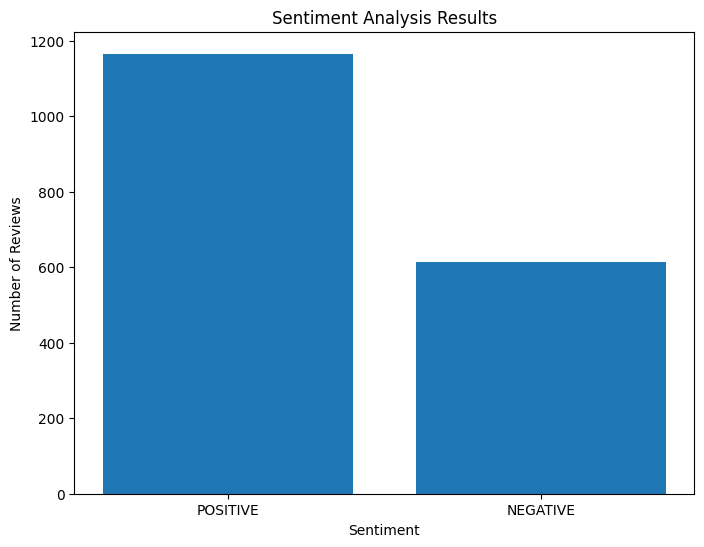

In [ ]:
# Visulising sentimental analysis

import matplotlib.pyplot as plt

# Assuming 'combined_df' is your DataFrame with 'sentiment_label' column
sentiment_counts = combined_df['sentiment_label'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

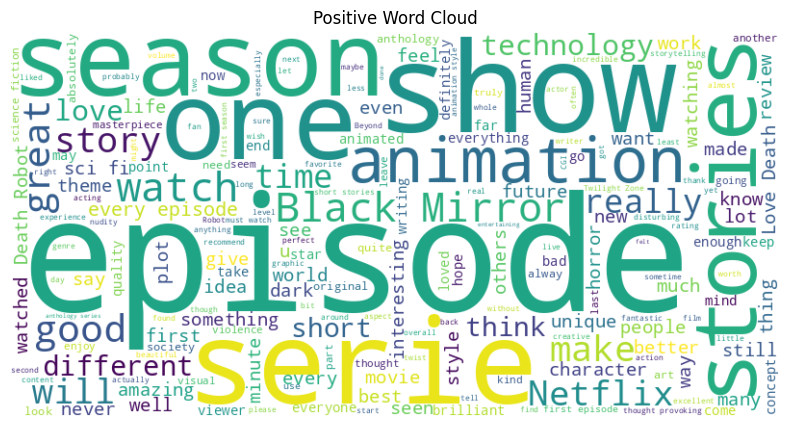

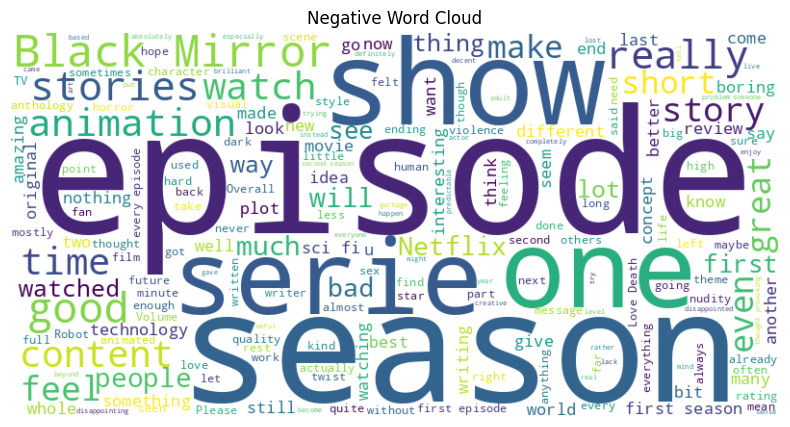

In [ ]:
# Visualizing Sentiment Analysis with Word Clouds

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 'combined_df' is your DataFrame with 'sentiment_label' and 'Content' columns

# Positive word cloud
positive_text = " ".join(combined_df[combined_df['sentiment_label'] == 'POSITIVE']['Content'].astype(str))
positive_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Word Cloud")
plt.show()

# Negative word cloud
negative_text = " ".join(combined_df[combined_df['sentiment_label'] == 'NEGATIVE']['Content'].astype(str))
negative_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Word Cloud")
plt.show()